In [27]:
import nibabel as nib

ana = nib.load('/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/ANASEG.nii.gz')
ctrs = nib.load('/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/CTres.nii.gz')
suv = nib.load('/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/SUV.nii.gz')
seg = nib.load('/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/SEG.nii.gz')
ana_data = ana.get_fdata()
ctrs_data = ctrs.get_fdata()
suv_data = suv.get_fdata()
seg_data = seg.get_fdata()
print("ana shape:", ana_data.shape)
print("ctrs shape:", ctrs_data.shape)
print("suv shape:", suv_data.shape)
print("seg shape:", seg_data.shape)

ana shape: (400, 400, 304)
ctrs shape: (400, 400, 304)
suv shape: (400, 400, 304)
seg shape: (400, 400, 304)


In [28]:
from loguru import logger
logger.info("="*50)
logger.info(f"Begins Fold 1".center(50))
logger.info("="*50 + "\n")

2024-10-05 20:22:06.461 | INFO     | __main__:<module>:2 - ==================================================
2024-10-05 20:22:06.462 | INFO     | __main__:<module>:3 -                   Begins Fold 1                   
2024-10-05 20:22:06.462 | INFO     | __main__:<module>:4 - ==================================================



In [29]:
logger.info("="*100)
logger.info("ATTENTION: THE PREPROCESSED DATA IS NOT EXIST, BEGIN CREATING THE PREPROCESSED DATA".center(100))
logger.info(f"ATTENTION: THIS MODE WILL NOT CREATE THE DATALOADER DIRECTLY".center(100))
logger.info(f"ATTENTION: AFTER THE PREPROCESSED DATA IS SAVED, TRY TO RELOAD THE DATALOADER AGAIN".center(100))
logger.info("="*100 + "\n")

2024-10-05 20:22:06.468 | INFO     | __main__:<module>:1 - ====================================================================================================
2024-10-05 20:22:06.469 | INFO     | __main__:<module>:2 -         ATTENTION: THE PREPROCESSED DATA IS NOT EXIST, BEGIN CREATING THE PREPROCESSED DATA         
2024-10-05 20:22:06.469 | INFO     | __main__:<module>:3 -                     ATTENTION: THIS MODE WILL NOT CREATE THE DATALOADER DIRECTLY                    
2024-10-05 20:22:06.470 | INFO     | __main__:<module>:4 -         ATTENTION: AFTER THE PREPROCESSED DATA IS SAVED, TRY TO RELOAD THE DATALOADER AGAIN         
2024-10-05 20:22:06.470 | INFO     | __main__:<module>:5 - ====================================================================================================



In [30]:
import nibabel as nib
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

anaseg_path = '/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0beb67c923/07-25-1999-NA-PET-CT Ganzkoerper  primaer mit KM-37911/ANASEG.nii.gz'
seg_path = '/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0beb67c923/07-25-1999-NA-PET-CT Ganzkoerper  primaer mit KM-37911/SEG.nii.gz'

anaseg_img = nib.load(anaseg_path)
seg_img = nib.load(seg_path)

anaseg_data = anaseg_img.get_fdata()
seg_data = seg_img.get_fdata()


# +1 because we need to include the canser label
num_classes = len(np.unique(anaseg_data)) + 1 
print(f"Number of classes: {num_classes}")
unique_labels = np.unique(anaseg_data)
print(f"Number of unique labels in ANASEG: {unique_labels}")

combined_data = anaseg_data.copy().astype(float)
# normalize the data to 0-1
for i, label in enumerate(np.unique(anaseg_data)):
    combined_data[anaseg_data == label] = i / num_classes
    
combined_data[seg_data == 1] = (num_classes - 1) / num_classes   
unique_labels = np.unique(combined_data)
print(f"Unique normalized labels in combined data: {unique_labels}")

combined_img = nib.Nifti1Image(combined_data, anaseg_img.affine)
nib.save(combined_img, '/Users/keyi/Desktop/MA/ANASEG/combined_normalized_label.nii.gz')

print("Combined normalized label data saved successfully.")
print(f"Data type of combined data: {combined_data.dtype}")

Number of classes: 115
Number of unique labels in ANASEG: [  0.   1.   2.   3.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117.]


KeyboardInterrupt: 

In [ ]:

from tqdm import tqdm
from loguru import logger
l = [[{'CTres': [1,2,3], 'SUV': [4,5,6], 'CONCAT': [7,8,9]}, {'CTres': [4,5,6], 'SUV': [7,8,9], 'CONCAT': [10,11,12]}],
     [{'CTres': [13,14,15], 'SUV': [16,17,18], 'CONCAT': [19,20,21]}, {'CTres': [22,23,24], 'SUV': [25,26,27], 'CONCAT': [28,29,30]}]]
l_single = [{'CTres': [13,14,15], 'SUV': [16,17,18], 'CONCAT': [19,20,21]}]

for sample in tqdm(l_single, desc="Removing ANA channel"):
    logger.info(f"sample is {sample}")
    if isinstance(sample, dict):
        logger.info("goto here")
        sample['CONCAT'] = sample['CONCAT'][:2]
    elif isinstance(sample, list):
        for j, sample_list in enumerate(sample):
            logger.info(f"sample list is {sample_list}")
            if "CONCAT" in sample_list:
                sample_list['CONCAT'] = sample_list['CONCAT'][:2]
    else:
        raise ValueError(f"sample is not a dict or list, but {type(sample)}")
         


Removing ANA channel:   0%|          | 0/1 [00:00<?, ?it/s]2024-10-01 00:06:33.792 | INFO     | __main__:<module>:8 - sample is {'CTres': [13, 14, 15], 'SUV': [16, 17, 18], 'CONCAT': [19, 20, 21]}
2024-10-01 00:06:33.792 | INFO     | __main__:<module>:10 - goto here
Removing ANA channel: 100%|██████████| 1/1 [00:00<00:00, 1034.10it/s]


data shape: (399, 399, 326)
data type: float64
unique value: [0. 1.]
unique value: [0. 1.]


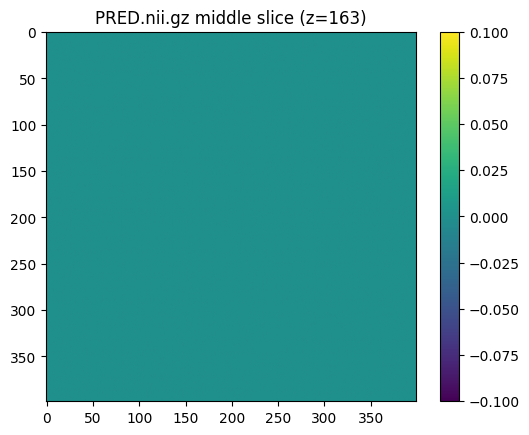

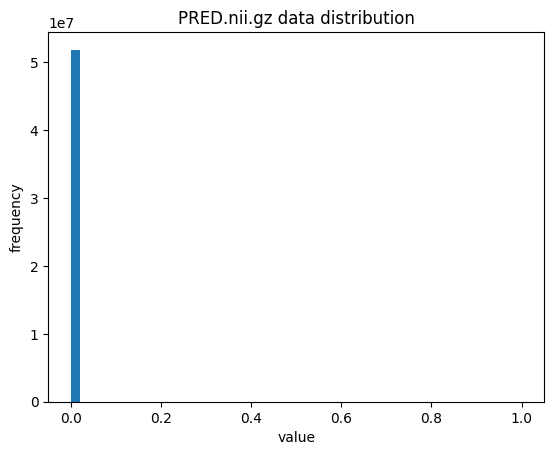

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

pred_img = nib.load('/Users/keyi/Desktop/DL_template/_assets/prediction/PRED/fold_0/PRED_PETCT_0beb67c923.nii.gz')
gt_img = nib.load('/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0beb67c923.nii.gz')
pred_data = pred_img.get_fdata()
gt_data = gt_img.get_fdata()

print(f"data shape: {pred_data.shape}")
print(f"data type: {pred_data.dtype}")
print(f"unique value: {np.unique(pred_data)}")
print(f"unique value: {np.unique(gt_data)}")
middle_slice = pred_data.shape[2] // 2
plt.imshow(pred_data[:, :, middle_slice], cmap='viridis')
plt.colorbar()
plt.title(f"PRED.nii.gz middle slice (z={middle_slice})")
plt.show()

plt.figure()
plt.hist(pred_data.flatten(), bins=50)
plt.title("PRED.nii.gz data distribution")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

In [ ]:
files = []
f_1 = [{'CTres': [1,2,3], 'SUV': [4,5,6], 'CONCAT': [7,8,9]}]
f_2 = [{'CTres': [1,2,3], 'SUV': [4,5,6], 'CONCAT': [7,8,9]}]
files.extend(f_1)
files.append(f_2)
print(files)


[{'CTres': [1, 2, 3], 'SUV': [4, 5, 6], 'CONCAT': [7, 8, 9]}, [{'CTres': [1, 2, 3], 'SUV': [4, 5, 6], 'CONCAT': [7, 8, 9]}]]


In [ ]:
path = '/tmp/scratch/AUTOPET2/FDG-PET-CT-Lesions/PETCT_0b98dbe00d/08-11-2002-NA-PET-CT Ganzkoerper  primaer mit KM-83616/CTres.nii.gz'
import glob
from pathlib import Path



path_obj = Path(path)
petct_part = next((part for part in path_obj.parts if part.startswith("PETCT_")), None)
if petct_part:
    print(petct_part)
else:
    print("No PETCT_ part found")


PETCT_0b98dbe00d


In [ ]:
import torch
import torch.nn.functional as F


# interpolate if needed
mask_out = torch.randn(1, 1, 399, 399, 326)
original_shape = torch.randn(400, 400, 326) 

print(mask_out.shape)
mask_out = F.interpolate(mask_out.float(), size=original_shape.shape, mode='nearest')
mask_out = mask_out.squeeze()

print(original_shape.shape)
print(mask_out.shape)


torch.Size([1, 1, 399, 399, 326])
torch.Size([400, 400, 326])
torch.Size([400, 400, 326])


In [22]:
import torch
import nibabel as nib
import numpy as np
from monai.metrics import DiceMetric, HausdorffDistanceMetric, SurfaceDistanceMetric, MeanIoU
healthy_pred_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/PRED/fold_0/PRED_PETCT_0c13e4df10.nii.gz'
healthy_gt_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0c13e4df10.nii.gz'
patient_pred_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/PRED/fold_0/PRED_PETCT_0beb67c923.nii.gz'
patient_gt_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0beb67c923.nii.gz'
patient2_pred_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/PRED/fold_4/PRED_PETCT_0b98dbe00d.nii.gz'
patient2_gt_seg = '/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_4/SEG_PETCT_0b98dbe00d.nii.gz'
def calculate_metrics(pred_path, gt_path):
    gt = nib.load(gt_path).get_fdata()
    pred = nib.load(pred_path).get_fdata()
    assert pred.shape == gt.shape, "Prediction and ground truth shape mismatch"

    gt_binary = (gt>0).astype(int)
    # it's healthy patient
    if np.all(gt_binary==0):
       return None
    else:
        pred = torch.from_numpy(pred).unsqueeze(0).unsqueeze(0)
        gt = torch.from_numpy(gt).unsqueeze(0).unsqueeze(0)
              
        dice_metric = DiceMetric(include_background=True, reduction="mean")
        hausdorff_metric = HausdorffDistanceMetric(include_background=True, percentile=95)
        surface_distance_metric = SurfaceDistanceMetric(include_background=True, symmetric=True)
        iou_metric = MeanIoU(include_background=True)
        

        dice = dice_metric(pred, gt)
        hausdorff = hausdorff_metric(pred, gt)
        surface_distance = surface_distance_metric(pred, gt)
        iou = iou_metric(pred, gt)
        return {
            "Dice": dice.item(),
            "HD95": hausdorff.item(),
            "SD": surface_distance.item(),
            "Iou": iou.item()
        }
# results = calculate_metrics(healthy_pred_seg, healthy_gt_seg)
# calculate_metrics(patient_pred_seg, patient_gt_seg)
results = []
result = calculate_metrics(patient2_pred_seg, patient2_gt_seg)


# print(f"FP rate: {results['FP_rate']:.6f}")
# print(f"FN rate: {results['FN_rate']:.6f}")
# print(f"Dice: {results['dice']:.4f}")
# print(f"HD95: {results['hd95']:.4f}")
# print(f"Surface Distance: {results['surface_distance']:.4f}")
# print(f"IoU: {results['iou']:.4f}")
result

{'Dice': 0.795666515827179,
 'HD95': 51.8714714050293,
 'SD': 5.259375095367432,
 'Iou': 0.6606695869837297}

In [24]:
import numpy as np
from monai.metrics import DiceMetric, HausdorffDistanceMetric, SurfaceDistanceMetric, MeanIoU
gt_img = nib.load('/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_4/SEG_PETCT_0b98dbe00d.nii.gz')
pred_img = nib.load('/Users/keyi/Desktop/DL_template/_assets/prediction/PRED/fold_4/PRED_PETCT_0b98dbe00d.nii.gz')
voronoi_img = nib.load('/Users/keyi/Desktop/DL_template/_assets/prediction/VORONOI/fold_4/VORONOI_PETCT_0b98dbe00d.nii.gz')

gt = gt_img.get_fdata()
pred = pred_img.get_fdata()
voronoi = voronoi_img.get_fdata()

voronoi_labels = np.unique(voronoi)
dice_metric = DiceMetric(include_background=True, reduction="mean")
hd_metric = HausdorffDistanceMetric(include_background=True, percentile=95)
asd_metric = SurfaceDistanceMetric(include_background=True, symmetric=True)
iou_metric = MeanIoU(include_background=True)
results = {}

for index,label in enumerate(voronoi_labels):
    region_mask  = voronoi == label
    pred_region = np.zeros_like(pred)
    gt_region = np.zeros_like(gt)
    
    pred_region[region_mask] = pred[region_mask]
    gt_region[region_mask] = gt[region_mask]
    
    pred_tensor = torch.from_numpy(pred_region).unsqueeze(0).unsqueeze(0)
    gt_tensor = torch.from_numpy(gt_region).unsqueeze(0).unsqueeze(0)
    
    dice = dice_metric(pred_tensor, gt_tensor).item()
    hd = hd_metric(pred_tensor, gt_tensor).item()
    asd = asd_metric(pred_tensor, gt_tensor).item()
    iou = iou_metric(pred_tensor, gt_tensor).item()
    results[label] = {
        "Dice": dice,
        "HD95": hd,
        "ASD": asd,
        "IoU": iou
    }

def safe_mean(values, key):
    values = [r[key] for r in results.values() if key in r]
    values = np.array(values)
    values[np.isinf(values)] = np.nan
    return np.nanmean(values)
global_dice = safe_mean(results.values(), 'Dice')
global_hd95 = safe_mean(results.values(), 'HD95')
global_asd = safe_mean(results.values(), 'ASD')
global_iou = safe_mean(results.values(), 'IoU')
print(f"Global Dice: {global_dice:.4f}")
print(f"Global HD95: {global_hd95:.4f}")
print(f"Global ASD: {global_asd:.4f}")
print(f"Global IoU: {global_iou:.4f}")







/opt/anaconda3/envs/cvhci/lib/python3.10/site-packages/monai/metrics/utils.py:334: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(


Global Dice: 0.1852
Global HD95: 5.7064
Global ASD: 3.4899
Global IoU: 0.1501


In [10]:
import os 
import glob
seg_folder = '/Users/keyi/Desktop/DL_template/_assets/prediction/SEG'
for index,seg_name in enumerate(sorted(os.listdir(seg_folder))):
    print(f"index: {index}, seg_path: {seg_name}")
    fold_path = os.path.join(seg_folder, seg_name)
    nii_files = glob.glob(os.path.join(fold_path, "*.nii.gz"))
    print(nii_files)
    
    

index: 0, seg_path: fold_0
['/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0c13e4df10.nii.gz', '/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0beb67c923.nii.gz']
index: 1, seg_path: fold_1
['/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_1/SEG_PETCT_0beb67c923.nii.gz']
index: 2, seg_path: fold_2
['/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_2/SEG_PETCT_0af7ffe12a.nii.gz']
index: 3, seg_path: fold_3
['/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_3/SEG_PETCT_0b98dbe00d.nii.gz']
index: 4, seg_path: fold_4
['/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_4/SEG_PETCT_0b98dbe00d.nii.gz']


In [18]:
from pathlib import Path

path_obj = Path('/Users/keyi/Desktop/DL_template/_assets/prediction/SEG/fold_0/SEG_PETCT_0c13e4df10.nii.gz')
file_name_part = path_obj.stem.split('.')
print(file_name_part)
identifier = file_name_part[0].split('_')
print(identifier)
file_name = identifier[1] + "_" + identifier[2]
file_name

['SEG_PETCT_0c13e4df10', 'nii']
['SEG', 'PETCT', '0c13e4df10']


'PETCT_0c13e4df10'

In [37]:
for index,seg_name in enumerate(sorted(os.listdir(seg_folder))):
    print(f"index: {index}, seg_path: {seg_name}")

index: 0, seg_path: fold_0
index: 1, seg_path: fold_1
index: 2, seg_path: fold_2
index: 3, seg_path: fold_3
index: 4, seg_path: fold_4


In [2]:
import numpy as np
all_possible_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21,22,23,24, 25, 26,
                                27, 32, 44, 51, 52, 53,54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
                                65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 
                                86, 90, 91, 92, 104, 116, 117, 118])


label_to_index = {label: index for index, label in enumerate(all_possible_labels)}
index_to_label = {index: label for label, index in label_to_index.items()}

max_num_classes = len(all_possible_labels)

def preprocess_labels(data):
    mapped_data = np.vectorize(label_to_index.get)(data)
    normalized_data = (data - min_label) / (max_label - min_label)
    return mapped_data

def postprocess_output(model_output):
    predicted_indices = np.argmax(model_output, axis=1)
    predicted_labels = np.vectorize(index_to_label.get)(predicted_indices)
    return predicted_labels
max_num_classes
model_output_channels = max_num_classes
print(f"Total possible labels: {len(all_possible_labels)}")
print(f"Model output channels: {model_output_channels}")

Total possible labels: 63
Model output channels: 63


In [10]:
import numpy as np
all_possible_labels = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21,22,23,24, 25, 26,
                                    27, 32, 44, 51, 52, 53,54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
                                    65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 
                                    86, 90, 91, 92, 104, 116, 117, 118])
l = len(all_possible_labels)
l
for index, label in enumerate(all_possible_labels):
    print(f"index: {index}, label: {label}")
l = len(all_possible_labels)
l

index: 0, label: 0
index: 1, label: 1
index: 2, label: 2
index: 3, label: 3
index: 4, label: 4
index: 5, label: 5
index: 6, label: 6
index: 7, label: 7
index: 8, label: 8
index: 9, label: 9
index: 10, label: 10
index: 11, label: 15
index: 12, label: 16
index: 13, label: 17
index: 14, label: 18
index: 15, label: 20
index: 16, label: 21
index: 17, label: 22
index: 18, label: 23
index: 19, label: 24
index: 20, label: 25
index: 21, label: 26
index: 22, label: 27
index: 23, label: 32
index: 24, label: 44
index: 25, label: 51
index: 26, label: 52
index: 27, label: 53
index: 28, label: 54
index: 29, label: 55
index: 30, label: 56
index: 31, label: 57
index: 32, label: 58
index: 33, label: 59
index: 34, label: 60
index: 35, label: 61
index: 36, label: 62
index: 37, label: 63
index: 38, label: 64
index: 39, label: 65
index: 40, label: 66
index: 41, label: 67
index: 42, label: 68
index: 43, label: 69
index: 44, label: 70
index: 45, label: 71
index: 46, label: 72
index: 47, label: 73
index: 48, l

63

In [14]:
import nibabel as nib
# PETCT_0cda25453b  0.98412698 (62/63)
# PETCT_0af7ffe12a 0.96825397 # healthy patient
intepolate = nib.load('/Users/keyi/Desktop/MA/AutoPet_Anatomy/FDG-PET-CT-Lesions/PETCT_0af7ffe12a/08-12-2005-NA-PET-CT Ganzkoerper  primaer mit KM-96698/interpolated_ANASEG.nii.gz')
intepolate_data = intepolate.get_fdata()
print(f"the shape of the intepolate data is {intepolate_data.shape}")
print(f"the unique values in the intepolate data are {np.unique(intepolate_data)}")
print(f"the length of the unique values in the intepolate data are {len(np.unique(intepolate_data))}")




the shape of the intepolate data is (400, 400, 304)
the unique values in the intepolate data are [  0.   1.   2.   3.   5.   6.   7.   8.   9.  10.  15.  16.  17.  18.
  20.  21.  25.  26.  27.  32.  44.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  86.  90.  91.  92. 104.
 116. 117.]
the length of the unique values in the intepolate data are 58


In [13]:
import torch 
class_range = torch.arange(63)
print(f"class_range: {class_range}")
print(f"class_range: {class_range.shape}")
class_range = class_range.view(1, -1, 1,1,1,1)
print(f"class_range: {class_range.shape}")
gt_classes = torch.randn(2, 1, 128, 128, 128)
gt_classes = gt_classes.unsqueeze(1)
print(f"gt_classes: {gt_classes.shape}")
mask = (gt_classes == class_range.view(1, -1, 1, 1, 1, 1)).any(dim=(2,3,4,5)).float()
print(f"mask: {mask.shape}")
print(f"mask: {mask}")

# print(f"any_mask: {any_mask.shape}")
# print(f"any_mask: {any_mask}")
# any_mask = any_mask.float()
# print(f"any_mask: {any_mask.shape}")
# print(f"any_mask: {any_mask}")


class_range: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62])
class_range: torch.Size([63])
class_range: torch.Size([1, 63, 1, 1, 1, 1])
gt_classes: torch.Size([2, 1, 1, 128, 128, 128])
mask: torch.Size([2, 63])
mask: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [6]:
from pathlib import Path

p = Path("dummy_path") / "dummy_file.nii.gz"
name = p.name.split(".")
name

['dummy_file', 'nii', 'gz']

In [1]:
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 20, 21,22,23,24, 25, 26,
                                27, 32, 44, 51, 52, 53, 54, 61, 62, 63, 64, 
                                65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 
                                86, 90, 91, 92, 116, 118])

a.shape

(55,)